In [1]:
from brainscapes import parcellations, atlases, spaces
from brainscapes.features import pools,gene_names,modalities
from nilearn import plotting

In [2]:
atlas = atlases.MULTILEVEL_HUMAN_ATLAS
atlas.select_parcellation(parcellations.JULICH_BRAIN_PROBABILISTIC_CYTOARCHITECTONIC_ATLAS)
print(atlas.regiontree)

Julich-Brain Probabilistic Cytoarchitectonic Atlas
├── telencephalon
│   ├── cerebral nuclei
│   │   ├── basal forebrain
│   │   │   ├── magnocellular group within septum
│   │   │   │   └── Ch 123 (Basal Forebrain)
│   │   │   │       ├── Ch 123 (Basal Forebrain) - left hemisphere
│   │   │   │       └── Ch 123 (Basal Forebrain) - right hemisphere
│   │   │   ├── sublenticular part of basal forebrain
│   │   │   │   └── Ch 4 (Basal Forebrain)
│   │   │   │       ├── Ch 4 (Basal Forebrain) - left hemisphere
│   │   │   │       └── Ch 4 (Basal Forebrain) - right hemisphere
│   │   │   └── magnocellular group within horizontal limb of diagnoal band
│   │   │       └── Ch 123 (Basal Forebrain)
│   │   │           ├── Ch 123 (Basal Forebrain) - left hemisphere
│   │   │           └── Ch 123 (Basal Forebrain) - right hemisphere
│   │   └── amygdala
│   │       ├── laterobasal group
│   │       │   └── LB (Amygdala)
│   │       │       ├── LB (Amygdala) - left hemisphere
│   │       │       

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI Colin 27
left hemisphere
right hemisphere


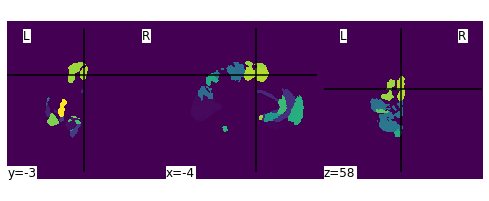

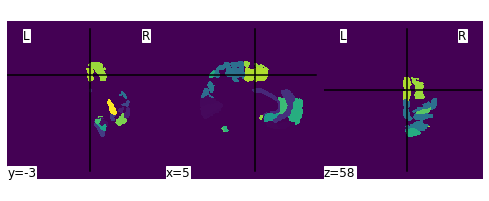

In [3]:
icbm_mri = atlas.get_template(spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
icbm_maps = atlas.get_maps(spaces.MNI_COLIN_27)
for name,nib in icbm_maps.items():
    print(name)
    plotting.plot_img(nib)

In [4]:
atlas.select_region('occipital cortex')
print(atlas.selected_region)

INFO:root:Selected region occipital cortex


occipital cortex
├── Area hOc2 (V2, 18)
│   ├── Area hOc2 (V2, 18) - left hemisphere
│   └── Area hOc2 (V2, 18) - right hemisphere
└── Area hOc1 (V1, 17, CalcS)
    ├── Area hOc1 (V1, 17, CalcS) - left hemisphere
    └── Area hOc1 (V1, 17, CalcS) - right hemisphere


In [9]:
features = atlas.query_data(
    modality=modalities.GeneExpression,
    gene=gene_names.GABARAPL2)
for feature in features:
    print(feature)

INFO:root:Retrieving probe ids for gene GABARAPL2


At ( -19, -62,   9)    race:Hispani  gender:F           age:49      Expression: [10.2,12.9] Z-score: [-0.3,-1.2]
At ( -23, -53,   2)    race:Hispani  gender:F           age:49      Expression: [10.2,13.3] Z-score: [-0.5,-0.1]
At (  -7, -75,   9)    race:Hispani  gender:F           age:49      Expression: [10.1,13.2] Z-score: [-0.5,-0.4]
At (  -6, -86,  10)    race:Hispani  gender:F           age:49      Expression: [10.1,13.2] Z-score: [-0.7,-0.4]
At (  -7, -86,  10)    race:Hispani  gender:F           age:49      Expression: [10.0,13.1] Z-score: [-0.8,-0.8]
At (  -7, -85,  -1)    race:Hispani  gender:F           age:49      Expression: [10.2,13.2] Z-score: [-0.4,-0.5]
At (  -3, -94,   9)    race:Hispani  gender:F           age:49      Expression: [10.2,13.2] Z-score: [-0.4,-0.4]
At ( -10, -75,   2)    race:Hispani  gender:F           age:49      Expression: [10.4,13.4] Z-score: [ 0.2, 0.1]
At (  -6, -94,   5)    race:Hispani  gender:F           age:49      Expression: [10.1,13.3] Z-sc

In [15]:
for region in atlas.regiontree.leaves:
    atlas.select_region(region)
    props = atlas.regionprops(spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)

INFO:root:Selected region Ch 123 (Basal Forebrain) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for Ch 123 (Basal Forebrain) - left hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


INFO:root:Selected region Ch 123 (Basal Forebrain) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for Ch 123 (Basal Forebrain) - right hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


INFO:root:Selected region Ch 4 (Basal Forebrain) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for Ch 4 (Basal Forebrain) - left hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


INFO:root:Selected region Ch 4 (Basal Forebrain) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for Ch 4 (Basal Forebrain) - right hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


INFO:root:Selected region Ch 123 (Basal Forebrain) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for Ch 123 (Basal Forebrain) - left hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


INFO:root:Selected region Ch 123 (Basal Forebrain) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for Ch 123 (Basal Forebrain) - right hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


INFO:root:Selected region LB (Amygdala) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Loading template image for space MNI 152 ICBM 2009c Nonlinear Asymmetric
Computing the mask for LB (Amygdala) - left hemisphere in MNI 152 ICBM 2009c Nonlinear Asymmetric
Loading 3D map for space  MNI 152 ICBM 2009c Nonlinear Asymmetric


AssertionError: 

In [8]:
modalities

['ConnectivityProfile', 'GeneExpression', 'ReceptorDistribution']

In [9]:
modalities[0]

'ConnectivityProfile'

In [15]:
ft = pools[modalities[0]][0]._FEATURETYPE

In [19]:
RegionalFeature in ft.__bases__

NameError: name 'RegionalFeature' is not defined

In [21]:
from brainscapes.features.feature import GlobalFeature

ImportError: cannot import name 'GlobalFeature' from 'brainscapes.features.feature' (/Users/tdickscheid/src/brainscapes/brainscapes/features/feature.py)